# **TASK 2 : PREDICTING USING UNSUPERVISED ML**

## *Author: Shivani Sharma*

## *Task: Use the 'iris' dataset to predict the optimim number of clusters and represent it visually*

### *Dataset: https://bit.ly/3kXTdox*

### **For this task we will use the K Means clustering method.**

## **Importing the libraries**

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.metrics as sm
import pylab
from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets

#### *Defining Visualization Patterns*

In [13]:
%matplotlib inline
rcParams["figure.figsize"] = 20,10

#### **Loading the iris dataset**

In [5]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.columns = ["sepal length", "sepal width", "petal length", "petal width"]


In [6]:
#Seeing the first 10 rows
iris_df.head(10)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


#### **Scaling the Iris Dataset**

In [7]:
data = scale(iris.data)

#defining the target
target = pd.DataFrame(iris.target)
data[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## **Clustering Model** 

In [8]:
#Creating Clusters
x = iris_df.iloc[:,[0,1,2,3]].values
#Finding the sum of squares within the clusters 
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## **Plotting Results**

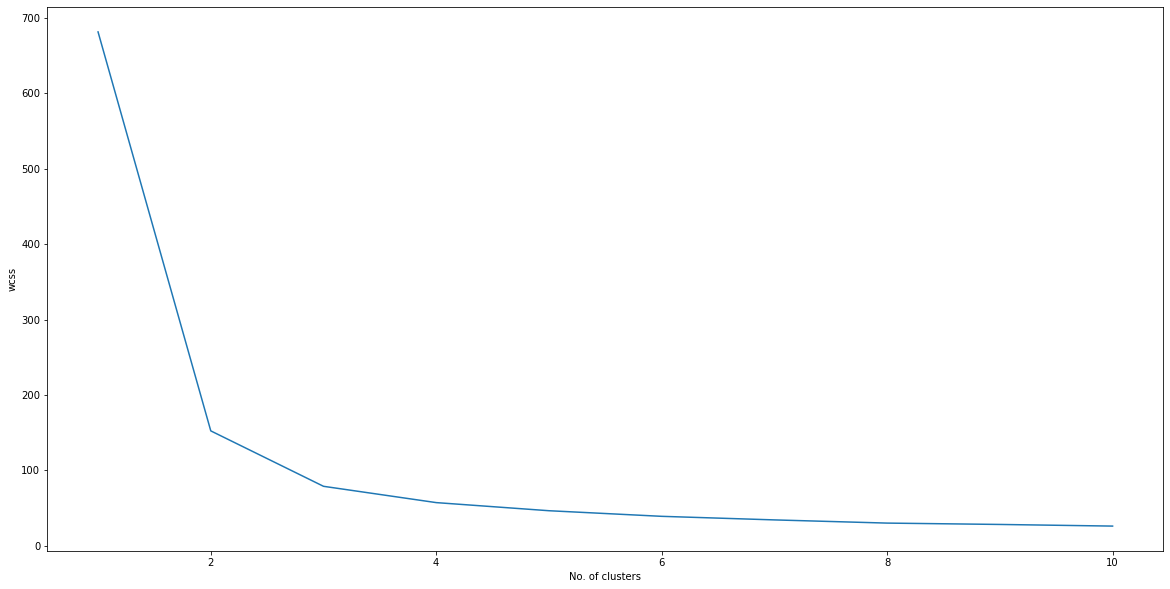

In [14]:
plt.plot(range(1,11), wcss)
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()

### *Optimumclusters occur where we obtain an elbow. The elbow occurs when the sum of squares does not decreasedrastically with every iteration. As we can see that the elbow occurs between 2 and 4 and hence we choose n_clusters=3*

### **Building a Clustering Model**

In [10]:
clustering = KMeans(n_clusters=3, random_state=0)

#Preparing a classifier
c_cluster = clustering.fit_predict(x)

## **Visualizing the Clusters**

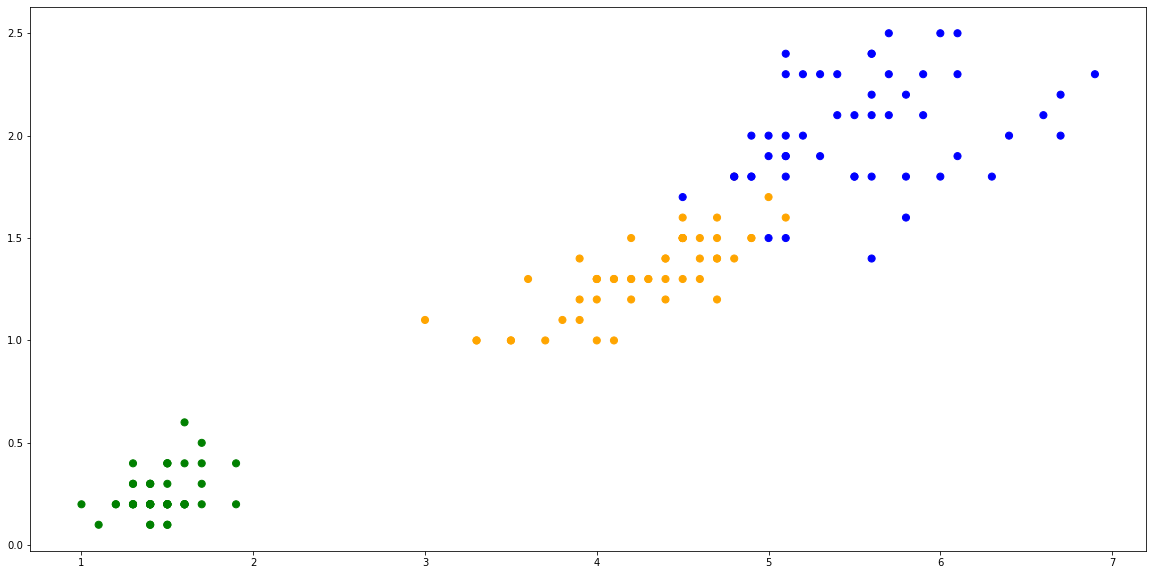

In [18]:
colors = np.array(["Green", "Orange", "Blue"])
plt.scatter(x=iris_df["petal length"],  y=iris_df["petal width"], c=colors[iris.target], s=50)

### **Plotting only the centroids of the 3 clusters**

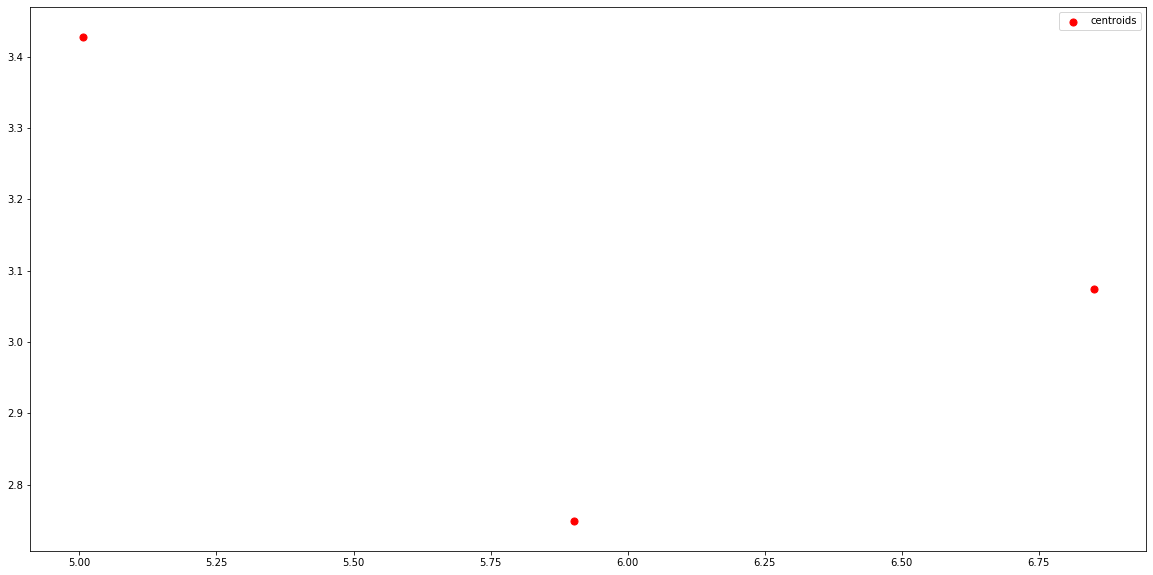

In [16]:
plt.scatter(clustering.cluster_centers_[:,0] , clustering.cluster_centers_[:,1] , s=50, c="red" , label ="centroids")
plt.legend()

### **Result**

### *The optimum number of clusters we obtained for the Iris Dataset is 3 and we visualized them as well*

### **THANKYOU**